In [1]:
import os
import time

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re

from copo import pretty_print

%matplotlib inline

In [2]:
EVALUATE_RESULTS_PATH = "./formal_evaluate_results"

os.listdir(EVALUATE_RESULTS_PATH)

['.DS_Store',
 '1011_ccppo_concat_evaluate_results.csv',
 '1003_copo_formal_evaluate_results.csv',
 '1003_ippo_evaluate_results.csv',
 '1003_cl_evaluate_results.csv',
 '1012_ccppo_mf_evaluate_results.csv']

In [3]:
eval_df = []

algo_set = set()
env_set = set()

count = 0

for p in os.listdir(EVALUATE_RESULTS_PATH):
    match = re.search("(.*?)_evaluate_results.csv", p)
    
    if match:
        
        count += 1
        
        exp_name = match[1]

        
        full_p = os.path.abspath(os.path.join(EVALUATE_RESULTS_PATH, p))
        
        try:
            tmp = pd.read_csv(full_p)
        except Exception as e:
            print(full_p)
            raise e

        tmp["exp_name"] = exp_name
        tmp["model_index"] = p
        
        
        if "_cl" in exp_name:
            # Special trement for CL, removing the evaluate results of the wrong checkpoints
            # We only keep results for checkpoint-1250
            # This might be inaccurate if you have multiple checkpoints after 3rd stage.
            tmp = tmp[tmp['path'].str.contains('1250')]


        eval_df.append(tmp)
        
        print(f"[{count}] Processed the agent: ", exp_name)
    else:
        print(p, " not exists!")
                
eval_df = pd.concat(eval_df)

.DS_Store  not exists!
[1] Processed the agent:  1011_ccppo_concat
[2] Processed the agent:  1003_copo_formal
[3] Processed the agent:  1003_ippo
[4] Processed the agent:  1003_cl
[5] Processed the agent:  1012_ccppo_mf


## Process the environment names

In [4]:
eval_df["env"].unique()

array(['Parking', 'Round', 'Bottle', 'PGMap', 'Tollgate', 'Inter',
       'CLMultiAgentParkingLotEnv', 'CLMultiAgentIntersectionEnv',
       'CLMultiAgentTollgateEnv', 'CLMultiAgentBottleneckEnv',
       'CLMultiAgentRoundaboutEnv', 'CLMultiAgentMetaDrive'], dtype=object)

In [5]:
for env_short_name in ["Inter", "Round", "Parking", "Bottle", "Tollgate"]:
    eval_df.loc[
        [env_short_name in item for item in eval_df.env],
        "env"
    ] = env_short_name
    
eval_df.loc[
    ["MetaDrive" in item for item in eval_df.env],
    "env"
] = "PGMap"

In [6]:
eval_df.env.unique()

array(['Parking', 'Round', 'Bottle', 'PGMap', 'Tollgate', 'Inter'],
      dtype=object)

In [7]:
eval_df.keys()

Index(['Unnamed: 0', 'velocity_step_mean_episode_min',
       'velocity_step_mean_episode_mean', 'velocity_step_mean_episode_max',
       'energy_step_mean_episode_min', 'energy_step_mean_episode_mean',
       'energy_step_mean_episode_max', 'num_neighbours_mean_episode_mean',
       'num_neighbours_mean_episode_max', 'num_agents_total',
       'num_agents_total_per_300_steps', 'success_rate', 'num_agents_success',
       'num_agents_success_per_300_steps', 'num_agents_failed_per_300_steps',
       'episode_reward_mean', 'episode_reward_min', 'episode_reward_max',
       'episode_cost_mean', 'episode_cost_min', 'episode_cost_max',
       'episode_cost_sum', 'crash_rate', 'num_agents_crash', 'out_rate',
       'num_agents_out', 'episode_length_mean', 'success_episode_length_mean',
       'svo_estimate_deg_mean', 'svo_estimate_deg_min', 'svo_estimate_deg_max',
       'svo_reward', 'path', 'count', 'algo', 'env', 'seed', 'trial',
       'trial_path', 'should_wrap_copo_env', 'should_wrap_c

## Discarding useless checkpoints according to max success rate rule

In [8]:
eval_df[
    (eval_df.env=="PGMap") &
    (eval_df.exp_name == "1003_ippo")
]

,Unnamed: 0,velocity_step_mean_episode_min,velocity_step_mean_episode_mean,velocity_step_mean_episode_max,energy_step_mean_episode_min,energy_step_mean_episode_mean,energy_step_mean_episode_max,num_neighbours_mean_episode_mean,num_neighbours_mean_episode_max,num_agents_total,...,algo,env,seed,trial,trial_path,should_wrap_copo_env,should_wrap_cc_env,episode,exp_name,model_index
380,380,0.0,43.361539,77.343168,0.0,0.069799,0.150884,1.927375,10.4,72,...,1003_ippo,PGMap,5000,IPPO_MultiAgentMetaDrive_ad347_00005_5_env=Mul...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,1,1003_ippo,1003_ippo_evaluate_results.csv
381,381,0.0,40.967634,80.645227,0.0,0.065800,0.161887,2.094833,10.4,76,...,1003_ippo,PGMap,5000,IPPO_MultiAgentMetaDrive_ad347_00005_5_env=Mul...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,2,1003_ippo,1003_ippo_evaluate_results.csv
382,382,0.0,41.321030,80.769594,0.0,0.065932,0.162857,2.082051,10.4,76,...,1003_ippo,PGMap,5000,IPPO_MultiAgentMetaDrive_ad347_00005_5_env=Mul...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,3,1003_ippo,1003_ippo_evaluate_results.csv
383,383,0.0,45.873053,78.928742,0.0,0.075986,0.155901,1.749560,10.4,75,...,1003_ippo,PGMap,5000,IPPO_MultiAgentMetaDrive_ad347_00005_5_env=Mul...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,4,1003_ippo,1003_ippo_evaluate_results.csv
384,384,0.0,44.214634,80.491442,0.0,0.071959,0.162153,1.808043,10.4,71,...,1003_ippo,PGMap,5000,IPPO_MultiAgentMetaDrive_ad347_00005_5_env=Mul...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,5,1003_ippo,1003_ippo_evaluate_results.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3555,0.0,10.122895,30.244837,0.0,0.010925,0.036841,3.383230,10.4,61,...,1003_ippo,PGMap,12000,IPPO_MultiAgentMetaDrive_ad347_00047_47_env=Mu...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,16,1003_ippo,1003_ippo_evaluate_results.csv
3556,3556,0.0,9.888277,19.549426,0.0,0.010487,0.022414,3.307890,10.4,61,...,1003_ippo,PGMap,12000,IPPO_MultiAgentMetaDrive_ad347_00047_47_env=Mu...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,17,1003_ippo,1003_ippo_evaluate_results.csv
3557,3557,0.0,8.951472,18.907273,0.0,0.009340,0.020177,3.488583,10.4,59,...,1003_ippo,PGMap,12000,IPPO_MultiAgentMetaDrive_ad347_00047_47_env=Mu...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,18,1003_ippo,1003_ippo_evaluate_results.csv
3558,3558,0.0,9.690543,34.849641,0.0,0.010298,0.044492,3.433002,10.4,62,...,1003_ippo,PGMap,12000,IPPO_MultiAgentMetaDrive_ad347_00047_47_env=Mu...,/home/zhenghao/CoPO/copo_code/copo/1003_ippo/I...,False,False,19,1003_ippo,1003_ippo_evaluate_results.csv


In [9]:
new_eval_df = []

for env, gb_env in eval_df.groupby("env"):  # Each env
    for exp_name, gb in gb_env.groupby('exp_name'):  # Each algorithm
        for seed, seed_gb in gb.groupby("seed"):  # Each seed
            best_checkpoint_value = float("-inf")
            best_checkpoint_data = None
            
            for path, ckpt_gb in seed_gb.groupby("path"):  # Find the best checkpoint
                
                val = ckpt_gb["success_rate"].mean()
                assert np.isscalar(val)
                
                if val > best_checkpoint_value:
                    best_checkpoint_value = val
                    best_checkpoint_data = ckpt_gb    
            
            print(f"For env={env}, algo={exp_name}, seed={seed}, we find {len(seed_gb.path.unique())} checkpoints and the best success rate is {best_checkpoint_value:.3f}")
            new_eval_df.append(best_checkpoint_data)  # Store the 20 episodes eval results of the best checkpoint

new_eval_df = pd.concat(new_eval_df)      

For env=Bottle, algo=1003_cl, seed=5000, we find 1 checkpoints and the best success rate is 0.678
For env=Bottle, algo=1003_cl, seed=6000, we find 1 checkpoints and the best success rate is 0.601
For env=Bottle, algo=1003_cl, seed=7000, we find 1 checkpoints and the best success rate is 0.525
For env=Bottle, algo=1003_cl, seed=8000, we find 1 checkpoints and the best success rate is 0.710
For env=Bottle, algo=1003_cl, seed=9000, we find 1 checkpoints and the best success rate is 0.648
For env=Bottle, algo=1003_cl, seed=10000, we find 1 checkpoints and the best success rate is 0.152
For env=Bottle, algo=1003_cl, seed=11000, we find 1 checkpoints and the best success rate is 0.738
For env=Bottle, algo=1003_cl, seed=12000, we find 1 checkpoints and the best success rate is 0.091
For env=Bottle, algo=1003_copo_formal, seed=5000, we find 5 checkpoints and the best success rate is 0.781
For env=Bottle, algo=1003_copo_formal, seed=6000, we find 6 checkpoints and the best success rate is 0.734

For env=PGMap, algo=1003_copo_formal, seed=9000, we find 5 checkpoints and the best success rate is 0.000
For env=PGMap, algo=1003_copo_formal, seed=10000, we find 6 checkpoints and the best success rate is 0.626
For env=PGMap, algo=1003_copo_formal, seed=11000, we find 6 checkpoints and the best success rate is 0.000
For env=PGMap, algo=1003_copo_formal, seed=12000, we find 5 checkpoints and the best success rate is 0.000
For env=PGMap, algo=1003_ippo, seed=5000, we find 4 checkpoints and the best success rate is 0.001
For env=PGMap, algo=1003_ippo, seed=6000, we find 4 checkpoints and the best success rate is 0.000
For env=PGMap, algo=1003_ippo, seed=7000, we find 4 checkpoints and the best success rate is 0.050
For env=PGMap, algo=1003_ippo, seed=8000, we find 3 checkpoints and the best success rate is 0.000
For env=PGMap, algo=1003_ippo, seed=9000, we find 4 checkpoints and the best success rate is 0.000
For env=PGMap, algo=1003_ippo, seed=10000, we find 4 checkpoints and the best 

For env=Round, algo=1003_ippo, seed=7000, we find 4 checkpoints and the best success rate is 0.680
For env=Round, algo=1003_ippo, seed=8000, we find 4 checkpoints and the best success rate is 0.669
For env=Round, algo=1003_ippo, seed=9000, we find 3 checkpoints and the best success rate is 0.606
For env=Round, algo=1003_ippo, seed=10000, we find 4 checkpoints and the best success rate is 0.692
For env=Round, algo=1003_ippo, seed=11000, we find 4 checkpoints and the best success rate is 0.770
For env=Round, algo=1003_ippo, seed=12000, we find 4 checkpoints and the best success rate is 0.693
For env=Round, algo=1011_ccppo_concat, seed=5000, we find 4 checkpoints and the best success rate is 0.681
For env=Round, algo=1011_ccppo_concat, seed=6000, we find 4 checkpoints and the best success rate is 0.715
For env=Round, algo=1011_ccppo_concat, seed=7000, we find 4 checkpoints and the best success rate is 0.694
For env=Round, algo=1011_ccppo_concat, seed=8000, we find 3 checkpoints and the be

In [10]:
len(new_eval_df)

4800

## Collecting metrics 

In [11]:
final_plot_data_from_eval_data = []


# === Success Rate: Number of successes / Number of spawn agents ===
# This value is recorded directly by evaluation script!
stat_key = "success_rate"
print_key = "Competence"
for env, gb_env in new_eval_df.groupby("env"):
    for exp_name, gb in gb_env.groupby('exp_name'):
        res = []
        for path, gbb in gb.groupby("path"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "checkpoint_index": path,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val,
                "exp_name": exp_name
            })
            print(env, exp_name, val)
            

# === Efficiency: The net successes in one episode ===
# Though we may have different episode length, we use 1000 steps as a general episode length.
# The "net successes" is the total number of successes minus total number of failures.
new_eval_df["fixed_efficiency"] = (
    new_eval_df["num_agents_success"] - new_eval_df["num_agents_crash"] - new_eval_df["num_agents_out"]
) / 1000
stat_key = "fixed_efficiency"
print_key = "Efficiency"
for env, gb_env in new_eval_df.groupby("env"):
    for exp_name, gb in gb_env.groupby('exp_name'):
        res = []
        for path, gbb in gb.groupby("path"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "checkpoint_index": path,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val,
                "exp_name": exp_name
            })
            

# === Safety: How many failures happen in one episode. ===
# Failure means an agent terminates without reaching destination.
new_eval_df["num_failed"] = new_eval_df["num_agents_crash"] + new_eval_df["num_agents_out"]
stat_key = "num_failed"
print_key = "Safety"
for env, gb_env in new_eval_df.groupby("env"):
    for exp_name, gb in gb_env.groupby('exp_name'):
        res = []
        for path, gbb in gb.groupby("path"):
            
            val = gbb[stat_key].mean()
            print("Env {}, Algo {}, Model {}, Val {:.3f} (Suc {:.3f}, "
                  "Eff {:.3f} Saf {:.3f}), total num agent {:.3f}"
                  .format(
                env, exp_name, path, val, gbb.success_rate.mean(), 
                gbb["fixed_efficiency"].mean(),
                gbb["num_failed"].mean(),
                gbb["num_agents_total"].mean(),
            ))

            val = -val
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "checkpoint_index": path,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val,
                "exp_name": exp_name
            })
            

Bottle 1003_cl 0.6780370322908238
Bottle 1003_cl 0.6012164367688151
Bottle 1003_cl 0.5254712435447972
Bottle 1003_cl 0.7097751252661553
Bottle 1003_cl 0.6479480231564703
Bottle 1003_cl 0.15244058227512422
Bottle 1003_cl 0.7377134172964133
Bottle 1003_cl 0.09091183908193598
Bottle 1003_copo_formal 0.7805565285749905
Bottle 1003_copo_formal 0.7335504419247035
Bottle 1003_copo_formal 0.724262616591088
Bottle 1003_copo_formal 0.18016101907208787
Bottle 1003_copo_formal 0.7015323903636594
Bottle 1003_copo_formal 0.5996507954604098
Bottle 1003_copo_formal 0.5461133607755821
Bottle 1003_copo_formal 0.2707206323128826
Bottle 1003_ippo 0.10691726869398795
Bottle 1003_ippo 0.16238105198992553
Bottle 1003_ippo 0.5173365120623153
Bottle 1003_ippo 0.08725499626958845
Bottle 1003_ippo 0.07612223792214609
Bottle 1003_ippo 0.18511767488390046
Bottle 1003_ippo 0.1085450876694368
Bottle 1003_ippo 0.6098732118107735
Bottle 1011_ccppo_concat 0.39104402270330385
Bottle 1011_ccppo_concat 0.06406633340976417

Env Bottle, Algo 1003_cl, Model /home/zhenghao/CoPO/copo_code/copo/1003_cl/IPPOCL_CLMultiAgentBottleneckEnv_e2a67_00003_3_env=CLMultiAgentBottleneckEnv,start_seed=5000,seed=0_2022-10-03_19-40-19/checkpoint_1250/checkpoint-1250, Val 34.400 (Suc 0.678, Eff 0.037 Saf 34.400), total num agent 105.850
Env Bottle, Algo 1003_cl, Model /home/zhenghao/CoPO/copo_code/copo/1003_cl/IPPOCL_CLMultiAgentBottleneckEnv_e2a67_00009_9_env=CLMultiAgentBottleneckEnv,start_seed=6000,seed=0_2022-10-03_19-40-19/checkpoint_1250/checkpoint-1250, Val 43.800 (Suc 0.601, Eff 0.022 Saf 43.800), total num agent 109.200
Env Bottle, Algo 1003_cl, Model /home/zhenghao/CoPO/copo_code/copo/1003_cl/IPPOCL_CLMultiAgentBottleneckEnv_e2a67_00015_15_env=CLMultiAgentBottleneckEnv,start_seed=7000,seed=0_2022-10-03_19-40-19/checkpoint_1250/checkpoint-1250, Val 49.850 (Suc 0.525, Eff 0.005 Saf 49.850), total num agent 104.500
Env Bottle, Algo 1003_cl, Model /home/zhenghao/CoPO/copo_code/copo/1003_cl/IPPOCL_CLMultiAgentBottleneckE

Env Round, Algo 1003_ippo, Model /home/zhenghao/CoPO/copo_code/copo/1003_ippo/IPPO_MultiAgentRoundaboutEnv_ad347_00046_46_env=MultiAgentRoundaboutEnv,start_seed=12000,seed=0_2022-10-04_01-33-26/checkpoint_430/checkpoint-430, Val 31.800 (Suc 0.693, Eff 0.043 Saf 31.800), total num agent 108.000
Env Round, Algo 1011_ccppo_concat, Model /home/zhenghao/CoPO/copo_code/copo/1011_ccppo_concat/CCPPOTrainerForMAOurEnvironment_CCMultiAgentRoundaboutEnv_8533d_00001_1_counterfactual=True,env=CCMultiAgentRoundaboutEnv,start_se_2022-10-11_10-52-49/checkpoint_625/checkpoint-625, Val 38.300 (Suc 0.681, Eff 0.043 Saf 38.300), total num agent 119.500
Env Round, Algo 1011_ccppo_concat, Model /home/zhenghao/CoPO/copo_code/copo/1011_ccppo_concat/CCPPOTrainerForMAOurEnvironment_CCMultiAgentRoundaboutEnv_8533d_00007_7_counterfactual=True,env=CCMultiAgentRoundaboutEnv,start_se_2022-10-11_10-52-49/checkpoint_610/checkpoint-610, Val 34.150 (Suc 0.715, Eff 0.051 Saf 34.150), total num agent 118.900
Env Round, Al

In [12]:
gbb.keys()

Index(['Unnamed: 0', 'velocity_step_mean_episode_min',
       'velocity_step_mean_episode_mean', 'velocity_step_mean_episode_max',
       'energy_step_mean_episode_min', 'energy_step_mean_episode_mean',
       'energy_step_mean_episode_max', 'num_neighbours_mean_episode_mean',
       'num_neighbours_mean_episode_max', 'num_agents_total',
       'num_agents_total_per_300_steps', 'success_rate', 'num_agents_success',
       'num_agents_success_per_300_steps', 'num_agents_failed_per_300_steps',
       'episode_reward_mean', 'episode_reward_min', 'episode_reward_max',
       'episode_cost_mean', 'episode_cost_min', 'episode_cost_max',
       'episode_cost_sum', 'crash_rate', 'num_agents_crash', 'out_rate',
       'num_agents_out', 'episode_length_mean', 'success_episode_length_mean',
       'svo_estimate_deg_mean', 'svo_estimate_deg_min', 'svo_estimate_deg_max',
       'svo_reward', 'path', 'count', 'algo', 'env', 'seed', 'trial',
       'trial_path', 'should_wrap_copo_env', 'should_wrap_c

In [13]:
final_plot_data_to_plot = pd.DataFrame(final_plot_data_from_eval_data)

final_plot_data_to_plot

# 3 metrics x 6 environments x 4 algorithms = 72 rows

,env,checkpoint_index,stat_key,print_key,value,exp_name
0,Bottle,/home/zhenghao/CoPO/copo_code/copo/1003_cl/IPP...,success_rate,Competence,0.678037,1003_cl
1,Bottle,/home/zhenghao/CoPO/copo_code/copo/1003_cl/IPP...,success_rate,Competence,0.601216,1003_cl
2,Bottle,/home/zhenghao/CoPO/copo_code/copo/1003_cl/IPP...,success_rate,Competence,0.525471,1003_cl
3,Bottle,/home/zhenghao/CoPO/copo_code/copo/1003_cl/IPP...,success_rate,Competence,0.709775,1003_cl
4,Bottle,/home/zhenghao/CoPO/copo_code/copo/1003_cl/IPP...,success_rate,Competence,0.647948,1003_cl
...,...,...,...,...,...,...
715,Tollgate,/home/zhenghao/CoPO/copo_code/copo/1012_ccppo_...,num_failed,Safety,-173.450000,1012_ccppo_mf
716,Tollgate,/home/zhenghao/CoPO/copo_code/copo/1012_ccppo_...,num_failed,Safety,-87.050000,1012_ccppo_mf
717,Tollgate,/home/zhenghao/CoPO/copo_code/copo/1012_ccppo_...,num_failed,Safety,-126.400000,1012_ccppo_mf
718,Tollgate,/home/zhenghao/CoPO/copo_code/copo/1012_ccppo_...,num_failed,Safety,-208.900000,1012_ccppo_mf


In [14]:
final_plot_data_to_plot.exp_name.unique()

array(['1003_cl', '1003_copo_formal', '1003_ippo', '1011_ccppo_concat',
       '1012_ccppo_mf'], dtype=object)

In [15]:
final_plot_data_to_plot.env.unique()

array(['Bottle', 'Inter', 'PGMap', 'Parking', 'Round', 'Tollgate'],
      dtype=object)

In [16]:
# Normalize each metric
new_df = []
for env, gb in final_plot_data_to_plot.groupby("env"):
    for k, gbb in gb.groupby("print_key"):
        
        val = gbb.value
        # print(f"Env {env}, Algo {algo}, Key {k}, val min {val.min()}, val max {val.max()}")
        val = (val - val.min()) / (val.max() - val.min())
        if abs(val.max() - val.min()) < 0.1:
            print(env, k, val)
        gb.loc[gb.print_key == k, "value"] = val
    new_df.append(gb)
final_plot_data_to_plot = pd.concat(new_df)

In [17]:
len(final_plot_data_to_plot[
    (final_plot_data_to_plot.print_key=="Competence") &
    (final_plot_data_to_plot.env == "Inter") &
    (final_plot_data_to_plot.exp_name == "1003_ippo")
])

# 3 checkpoints

8

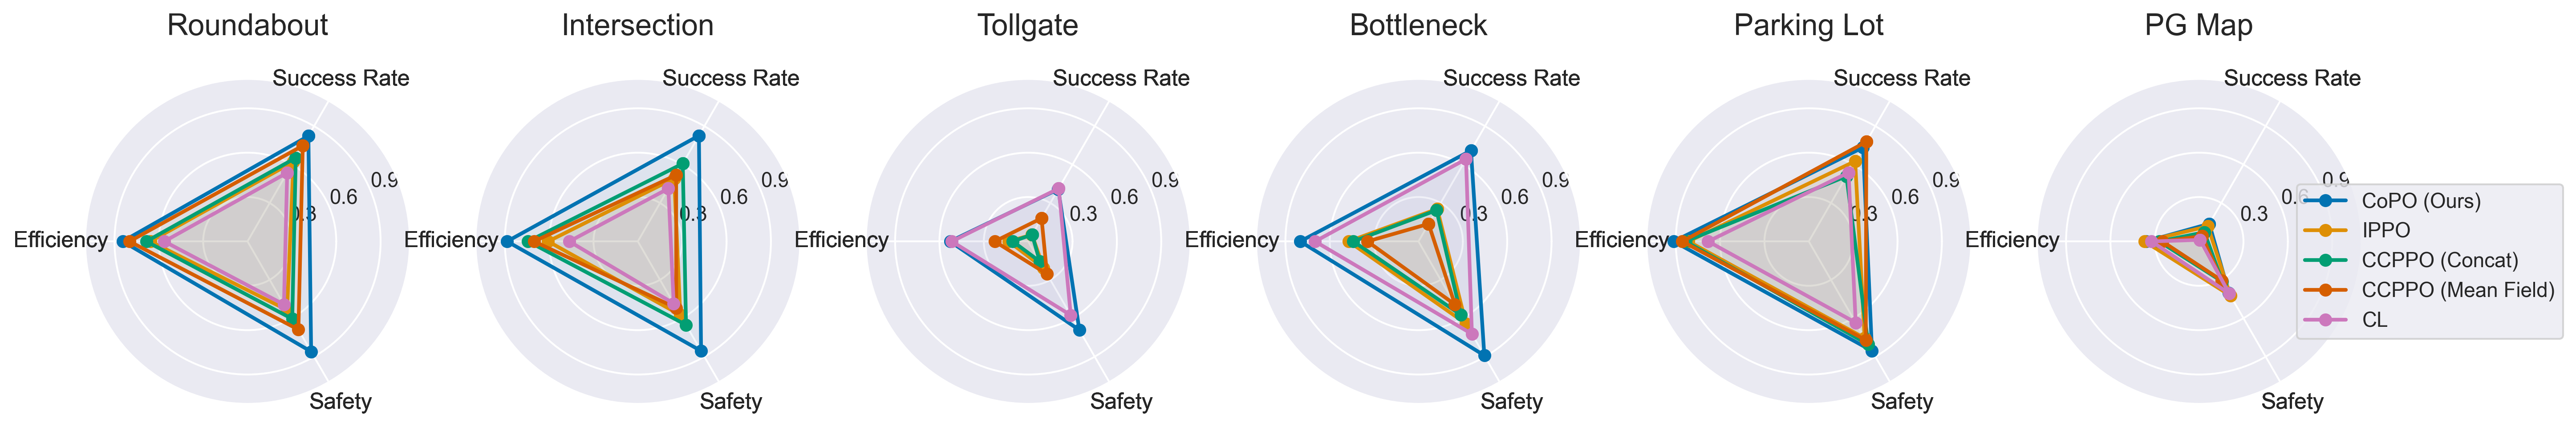

In [18]:
sns.set("notebook", "darkgrid")
c = sns.color_palette("colorblind")


# Rename and reorder environments and algorithms
env_mapping = {
    "Round": "Roundabout",
    "Inter": "Intersection",
    "Tollgate": "Tollgate",
    "Bottle": "Bottleneck",
    "Parking": "Parking Lot",
    "PGMap": "PG Map"
}

algo_mapping = {
    "1003_copo_formal": "CoPO (Ours)",
    "1003_ippo": "IPPO",
    "1011_ccppo_concat": "CCPPO (Concat)",
    "1012_ccppo_mf": "CCPPO (Mean Field)",
    "1003_cl": "CL"
}

# matplotlib.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(dpi=300, figsize=(22, 6))  

for env_count, env in enumerate(env_mapping.keys()):
    env_plot_data = final_plot_data_to_plot[final_plot_data_to_plot.env == env] 

    ax = fig.add_subplot(1, 6, env_count + 1, polar=True)
    
    for algo_count, algo in enumerate(algo_mapping.keys()):
        algo_plot_data = env_plot_data[env_plot_data.exp_name == algo]
    
        draw_labels = ["Competence", "Efficiency", "Safety"]
        plot_labels = ["Success Rate", "Efficiency", "Safety"]
        
        stats = [algo_plot_data[algo_plot_data.print_key == k].value.mean() for k in draw_labels]
        
        angles = np.linspace(0, 2*np.pi, len(draw_labels), endpoint=False)+ np.pi/2 - np.pi / 6
        stats = np.concatenate((stats, [stats[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax.plot(angles, stats, 'o-', linewidth=2, label=algo_mapping[algo], c=c[algo_count])
        ax.fill(angles, stats, alpha=0.05, c=c[algo_count])
        ax.set_ylim(0, 1.1)
        
        # print("Env {}, Algo {}, {}, {}".format(env, algo, angles, plot_labels))
        ax.set_thetagrids(angles[:3] * 180/np.pi, plot_labels)
        
        ax.tick_params(pad=0)

        plt.gcf().canvas.draw()
        labels = []
        angles2 = [0, 0, 0]
        for label, angle in zip(ax.get_xticklabels(), angles2):
            x,y = label.get_position()
            lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                          ha=label.get_ha(), va=label.get_va(),
                          fontname=label.get_fontname(),
                          fontstyle="normal",
                          fontweight="light"
                         )
            lab.set_rotation(angle)
        ax.set_xticklabels([])
        ax.set_yticks([0.3, 0.6, 0.9])
        ax.set_title(env_mapping[env], size=16, y=1.1)
        
ax.legend(loc=(0.8, 0.2))
fig.savefig("evaluate_result_1m.pdf".format(env), format='pdf', dpi=300, bbox_inches = "tight")
fig.savefig("evaluate_result_1m.png".format(env), format='png', dpi=300, bbox_inches = "tight")


In [19]:
for (print_key, print_key_df) in pd.DataFrame(final_plot_data_from_eval_data).groupby("print_key"):
    print(print_key)
    for (env, algo), gb in final_plot_data_to_plot.groupby(["env", "exp_name"]):
        print(env, '\t', algo, '\t', gb["value"].mean())
        
    print('\n\n')

Competence
Bottle 	 1003_cl 	 0.6883205467616635
Bottle 	 1003_copo_formal 	 0.8001340809306633
Bottle 	 1003_ippo 	 0.45580069114091365
Bottle 	 1011_ccppo_concat 	 0.41917566112985694
Bottle 	 1012_ccppo_mf 	 0.3249163518648597
Inter 	 1003_cl 	 0.4537338120939482
Inter 	 1003_copo_formal 	 0.8552526980176469
Inter 	 1003_ippo 	 0.5575456939757081
Inter 	 1011_ccppo_concat 	 0.667041840063982
Inter 	 1012_ccppo_mf 	 0.5799372900911914
PGMap 	 1003_cl 	 0.24694973948372212
PGMap 	 1003_copo_formal 	 0.2998555391647702
PGMap 	 1003_ippo 	 0.3033056657824227
PGMap 	 1011_ccppo_concat 	 0.21863335326218647
PGMap 	 1012_ccppo_mf 	 0.19843272283247515
Parking 	 1003_cl 	 0.6176554986076658
Parking 	 1003_copo_formal 	 0.8338452563301461
Parking 	 1003_ippo 	 0.7321460840638133
Parking 	 1011_ccppo_concat 	 0.715624380439973
Parking 	 1012_ccppo_mf 	 0.80139233762148
Round 	 1003_cl 	 0.5306200851584607
Round 	 1003_copo_formal 	 0.8426900183580458
Round 	 1003_ippo 	 0.6050726397760676
Rou